<a href="https://colab.research.google.com/github/Karlajack/pydata_analysis/blob/main/pandasvisulizationproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# read the csv file and convert to dataframe

url='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv'
df=pd.read_csv(url)
df

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,Milk - inc. cheese,21.91,31.21
1426,Bangladesh,Wheat and Wheat Products,17.47,3.33
1427,Bangladesh,Rice,171.73,219.76
1428,Bangladesh,Soybeans,0.61,0.27


In [9]:
#Check dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [13]:
# Check missness
df.isnull().sum()

country          0
food_category    0
consumption      0
co2_emmission    0
dtype: int64

In [16]:
# check the  number columns
df.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

In [76]:
df['country'].value_counts()

country
Argentina     11
Zimbabwe      11
Belize        11
Namibia       11
Jamaica       11
              ..
Russia        11
Germany       11
Belgium       11
Venezuela     11
Bangladesh    11
Name: count, Length: 130, dtype: int64

In [87]:

eat=df[df.country.isin(['Kenya', 'Uganda', 'Tanzania', 'Rwanda','Ethiopia'])].reset_index()
eat.head()


,index,country,food_category,consumption,co2_emmission
0,902,Kenya,Pork,0.29,1.03
1,903,Kenya,Poultry,0.47,0.50
2,904,Kenya,Beef,9.54,294.38
3,905,Kenya,Lamb & Goat,1.86,65.14
4,906,Kenya,Fish,4.27,6.82


In [92]:
fc_df=eat.groupby('food_category')[['co2_emmission']].sum().sort_values(by='co2_emmission',ascending=True).reset_index()
fc_df

,food_category,co2_emmission
0,Soybeans,1.18
1,Eggs,3.59
2,Poultry,6.25
3,Pork,16.85
4,Wheat and Wheat Products,19.70
5,Nuts inc. Peanut Butter,23.25
6,Fish,42.14
7,Rice,63.40
8,Lamb & Goat,276.31
9,Milk - inc. cheese,318.77


In [93]:
fc_df['food_category']

0                     Soybeans
1                         Eggs
2                      Poultry
3                         Pork
4     Wheat and Wheat Products
5      Nuts inc. Peanut Butter
6                         Fish
7                         Rice
8                  Lamb & Goat
9           Milk - inc. cheese
10                        Beef
Name: food_category, dtype: object

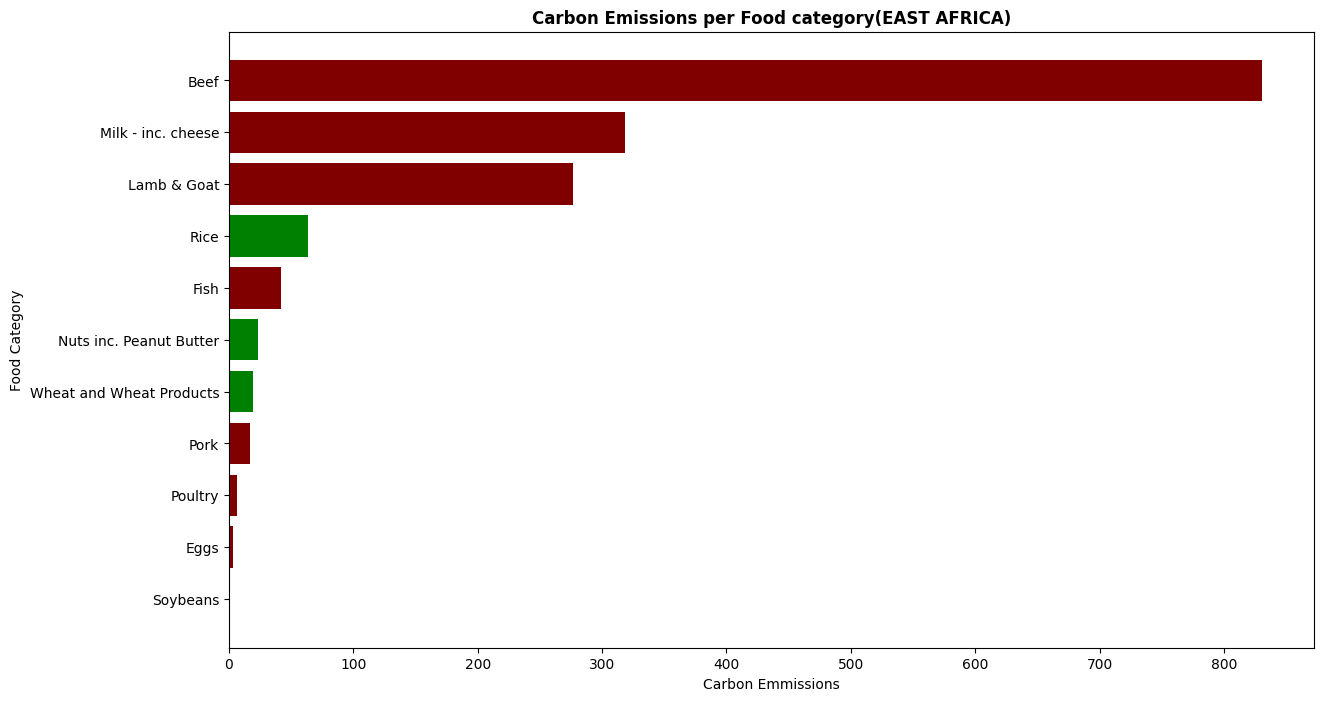

In [96]:
food_category=fc_df['food_category']
values=fc_df['co2_emmission']
colors=['maroon' if word in('Beef','Pork','Milk - inc. cheese', 'Lamb & Goat','Pork', 'Fish', 'Poultry', 'Eggs') else 'green' for word in fc_df.food_category]
plt.figure(figsize=(14,8))
plt.barh(food_category, values,color=colors)
plt.title("Carbon Emissions per Food category(EAST AFRICA)",fontsize=12,fontweight='bold')
plt.xlabel("Carbon Emmissions")
plt.ylabel("Food Category")
plt.show()


